#DATASETS

In [ ]:
import urllib.request

emotions = urllib.request.urlopen(

   'https://raw.githubusercontent.com/google-research/google-research'

   '/master/goemotions/data/emotions.txt').read().decode('utf8').split('\n')

In [ ]:
import tensorflow_datasets as tfds

# Load a single example from the dataset
ds = tfds.load('goemotions', split='train', as_supervised=False)
example = next(iter(ds))

# Print the keys in the example
print(example.keys())


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/43410 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/goemotions/0.1.0.incomplete8LORN8/goemotions-train.tfrecord*...:   0%|    …

Generating validation examples...:   0%|          | 0/5426 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/goemotions/0.1.0.incomplete8LORN8/goemotions-validation.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/5427 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/goemotions/0.1.0.incomplete8LORN8/goemotions-test.tfrecord*...:   0%|     …

Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.
dict_keys(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'comment_text', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise'])


In [ ]:

import tensorflow_datasets as tfds
import pandas as pd

def load_and_prepare_data(split='train'):
    # Load the dataset
    ds = tfds.load('goemotions', split=split, as_supervised=False)

    # Prepare a list to hold the data
    data = []

    # Iterate through the dataset
    for item in ds:
        # Extract comment text
        comment_text = item['comment_text'].numpy().decode('utf-8')

        # Collect present emotions
        emotions = [emotion for emotion, value in item.items() if emotion != 'comment_text' and value.numpy() == 1]

        # Append to the data list
        data.append({'comment_text': comment_text, 'emotions': ', '.join(emotions)})

    # Convert list to DataFrame
    df = pd.DataFrame(data)

    # Display first few rows of the dataframe
    print(df.head())

    return df

def save_to_csv(df, filename='goemotions_data.csv'):
    # Save DataFrame to CSV
    df.to_csv(filename, index=False)
    print(f'Data saved to {filename}')

# Load, prepare and save the dataset for the train split
df = load_and_prepare_data('train')
save_to_csv(df)

                                        comment_text                emotions
0  It's just wholesome content, from questionable...                 neutral
1                          This is actually awesome.              admiration
2  People really spend more than $10 in an app ga...      confusion, sadness
3  I grew up on the other side of Ama but live in...                 neutral
4  What the problem? I mean, steak? Good. Doughnu...  curiosity, disapproval
Data saved to goemotions_data.csv


In [ ]:
df.head()

comment_text                emotions
0  It's just wholesome content, from questionable...                 neutral
1                          This is actually awesome.              admiration
2  People really spend more than $10 in an app ga...      confusion, sadness
3  I grew up on the other side of Ama but live in...                 neutral
4  What the problem? I mean, steak? Good. Doughnu...  curiosity, disapproval

In [ ]:
# prompt: in the above how many emotions were present and some rows contains more than one emotion in the column seperated ,  those print should seperate

# Count the number of emotions present in the dataset
unique_emotions = set()
for emotions in df['emotions']:
  for emotion in emotions.split(', '):
    unique_emotions.add(emotion)
print(f"Number of emotions present: {len(unique_emotions)}")

# Print rows with multiple emotions separated
for i, row in df.iterrows():
  if len(row['emotions'].split(', ')) > 1:
    print(f"Row {i+1}: {row['emotions']}")


In [ ]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("dair-ai/emotion")

# Combine all splits into a single DataFrame
combined_df = pd.concat([dataset[split].to_pandas() for split in dataset.keys()], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv("twitter.csv", index=False)

print("Combined data has been successfully saved to 'twitter.csv'.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Combined data has been successfully saved to 'twitter.csv'.


# Twitter Data

In [ ]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv("twitter.csv")

# Print the count of occurrences for each class
class_counts = combined_df['label'].value_counts()
print(class_counts)


label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64


In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nlpaug.augmenter.word as naw
import random

# Load the dataset
combined_df = pd.read_csv("twitter.csv")

# Print the initial class distribution
class_counts = combined_df['label'].value_counts()
print("Initial class distribution:")
print(class_counts)

# Maximum size to match
max_size = class_counts.max()

# Initialize augmenters
synonym_augmenter = naw.SynonymAug(aug_src='wordnet')
spelling_augmenter = naw.SpellingAug()

# Function to augment data
def augment_data(group, label, synonym_augmenter, spelling_augmenter, samples_needed):
    augmented_texts = []
    while len(augmented_texts) < samples_needed:
        text = random.choice(group['text'].values)  # Randomly choose a text to augment
        if random.random() > 0.5:  # Randomly choose the type of augmentation
            augmented_text = synonym_augmenter.augment(text)
        else:
            augmented_text = spelling_augmenter.augment(text)
        augmented_texts.append(augmented_text)
    new_data = pd.DataFrame(augmented_texts, columns=['text'])
    new_data['label'] = label
    return new_data

# Augment each class if needed
augmented_data = pd.DataFrame()
for label, group in combined_df.groupby('label'):
    count = len(group)
    if count < max_size:
        augmented_data = pd.concat([augmented_data, augment_data(group, label, synonym_augmenter, spelling_augmenter, max_size - count)])

# Combine original and augmented data
balanced_df = pd.concat([combined_df, augmented_data], ignore_index=True)

# Check new class distribution
new_class_counts = balanced_df['label'].value_counts()
print("New class distribution after augmentation:")
print(new_class_counts)

# Save the balanced dataset to a CSV file
balanced_df.to_csv("balanced_twitter.csv", index=False)
print("Balanced dataset saved as 'balanced_twitter.csv'.")


Initial class distribution:
label
1    6761
0    5797
3    2709
4    2373
2    1641
5     719
Name: count, dtype: int64
New class distribution after augmentation:
label
0    6761
3    6761
2    6761
5    6761
4    6761
1    6761
Name: count, dtype: int64
Balanced dataset saved as 'balanced_twitter.csv'.


## LSTM ON BOTH VARIANTS OF DATASETS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [ ]:
def preprocess_data(df):
    tokenizer = Tokenizer(num_words=5000, lower=True)
    tokenizer.fit_on_texts(df['text'].values)
    X = tokenizer.texts_to_sequences(df['text'].values)
    X = pad_sequences(X, maxlen=50)
    y = pd.get_dummies(df['label']).values
    return X, y, tokenizer


In [ ]:
def build_lstm_model(input_length):
    model = Sequential()
    model.add(Embedding(5000, 100, input_length=input_length))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(6, activation='softmax'))  # Adjust according to number of classes
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
def train_and_save_model(X, y, filename):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = build_lstm_model(X_train.shape[1])
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=2)
    model.save(filename)
    return history, model, X_test, y_test


In [ ]:
# Load datasets
df_imbalanced = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/twitter.csv')
df_balanced = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/balanced_twitter.csv')

# Preprocess datasets
X_imbalanced, y_imbalanced, tokenizer_imbalanced = preprocess_data(df_imbalanced)
X_balanced, y_balanced, tokenizer_balanced = preprocess_data(df_balanced)

# Train and save models for each dataset
history_imbalanced, model_imbalanced, X_test_imbalanced, y_test_imbalanced = train_and_save_model(X_imbalanced, y_imbalanced, 'lstm_imbalanced.h5')
history_balanced, model_balanced, X_test_balanced, y_test_balanced = train_and_save_model(X_balanced, y_balanced, 'lstm_balanced.h5')


Epoch 1/5
197/197 - 44s - loss: 1.4728 - accuracy: 0.4213 - val_loss: 1.0826 - val_accuracy: 0.6036 - 44s/epoch - 224ms/step
Epoch 2/5
197/197 - 27s - loss: 0.6608 - accuracy: 0.7801 - val_loss: 0.4363 - val_accuracy: 0.8707 - 27s/epoch - 137ms/step
Epoch 3/5
197/197 - 26s - loss: 0.2598 - accuracy: 0.9174 - val_loss: 0.3179 - val_accuracy: 0.8929 - 26s/epoch - 133ms/step
Epoch 4/5
197/197 - 25s - loss: 0.1523 - accuracy: 0.9523 - val_loss: 0.2928 - val_accuracy: 0.9000 - 25s/epoch - 129ms/step
Epoch 5/5
197/197 - 26s - loss: 0.1178 - accuracy: 0.9608 - val_loss: 0.2837 - val_accuracy: 0.9014 - 26s/epoch - 132ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
400/400 - 66s - loss: 1.1010 - accuracy: 0.5823 - val_loss: 0.4335 - val_accuracy: 0.8637 - 66s/epoch - 166ms/step
Epoch 2/5
400/400 - 52s - loss: 0.3216 - accuracy: 0.8954 - val_loss: 0.3214 - val_accuracy: 0.8944 - 52s/epoch - 129ms/step
Epoch 3/5
400/400 - 52s - loss: 0.2042 - accuracy: 0.9326 - val_loss: 0.2987 - val_accuracy: 0.8996 - 52s/epoch - 129ms/step
Epoch 4/5
400/400 - 51s - loss: 0.1577 - accuracy: 0.9480 - val_loss: 0.2966 - val_accuracy: 0.9035 - 51s/epoch - 127ms/step
Epoch 5/5
400/400 - 51s - loss: 0.1239 - accuracy: 0.9584 - val_loss: 0.3237 - val_accuracy: 0.8989 - 51s/epoch - 127ms/step


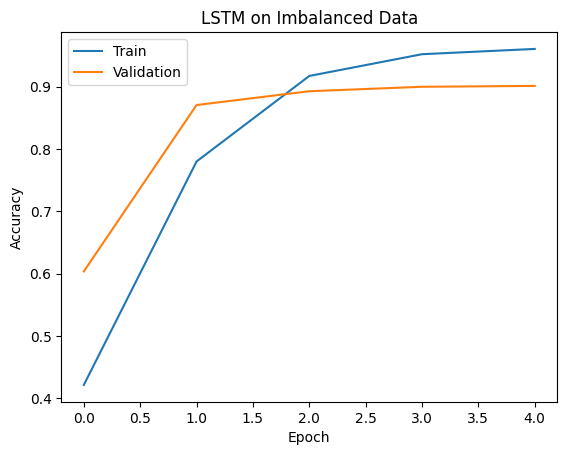

In [ ]:
def plot_history(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history_imbalanced, 'LSTM on Imbalanced Data')
plot_history(history_balanced, 'LSTM on Balanced Data')


In [ ]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Accuracy : {accuracy*100:.2f}%')

evaluate_model(model_imbalanced, X_test_imbalanced, y_test_imbalanced)
evaluate_model(model_balanced, X_test_balanced, y_test_balanced)


Test Accuracy: 91.10%
Test Accuracy: 89.92%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
def decode_predictions(y_pred):
    return np.argmax(y_pred, axis=1)

def decode_true_labels(y_true):
    return np.argmax(y_true, axis=1)


In [ ]:
def evaluate_and_plot(model, X_test, y_test, class_labels, dataset_type):
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_decoded = decode_predictions(y_pred)
    y_true_decoded = decode_true_labels(y_test)

    # Accuracy
    accuracy = accuracy_score(y_true_decoded, y_pred_decoded)
    print(f'Test Accuracy for {dataset_type}: {accuracy*100:.2f}%')

    # Classification Report
    print(f'Classification Report for {dataset_type}:')
    print(classification_report(y_true_decoded, y_pred_decoded, target_names=class_labels))

    # Confusion Matrix
    plot_confusion_matrix(y_true_decoded, y_pred_decoded, classes=class_labels, title=f'Confusion Matrix for {dataset_type}')


188/188 [==============================] - 4s 18ms/step
Test Accuracy for Imbalanced Dataset: 91.10%
Classification Report for Imbalanced Dataset:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1796
           3       0.96      0.89      0.93      1974
           2       0.74      0.92      0.82       499
           5       0.91      0.93      0.92       828
           4       0.88      0.84      0.86       682
           1       0.74      0.80      0.77       221

    accuracy                           0.91      6000
   macro avg       0.86      0.89      0.88      6000
weighted avg       0.92      0.91      0.91      6000



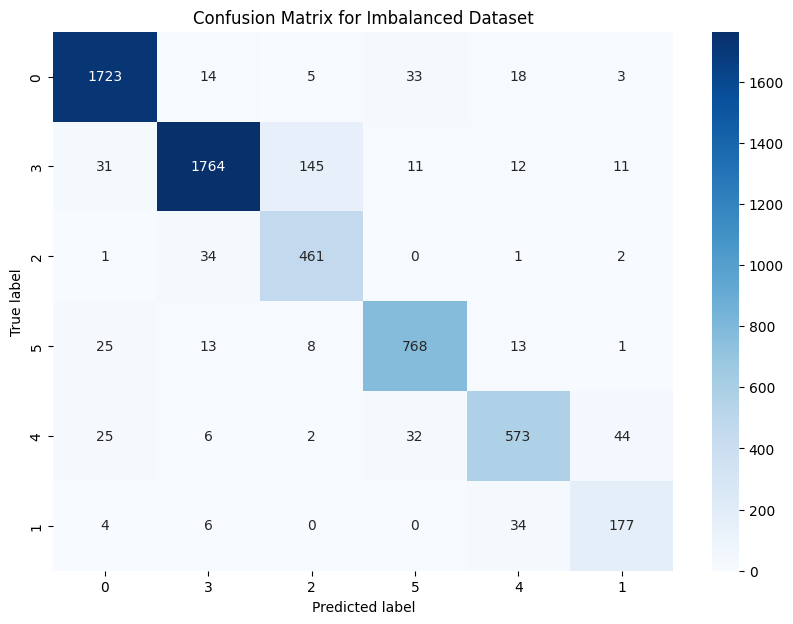

381/381 [==============================] - 7s 18ms/step
Test Accuracy for Balanced Dataset: 89.92%
Classification Report for Balanced Dataset:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      2054
           3       0.90      0.93      0.91      2006
           2       0.90      0.91      0.91      2019
           5       0.90      0.89      0.90      2072
           4       0.81      0.90      0.85      1973
           1       0.94      0.89      0.91      2046

    accuracy                           0.90     12170
   macro avg       0.90      0.90      0.90     12170
weighted avg       0.90      0.90      0.90     12170



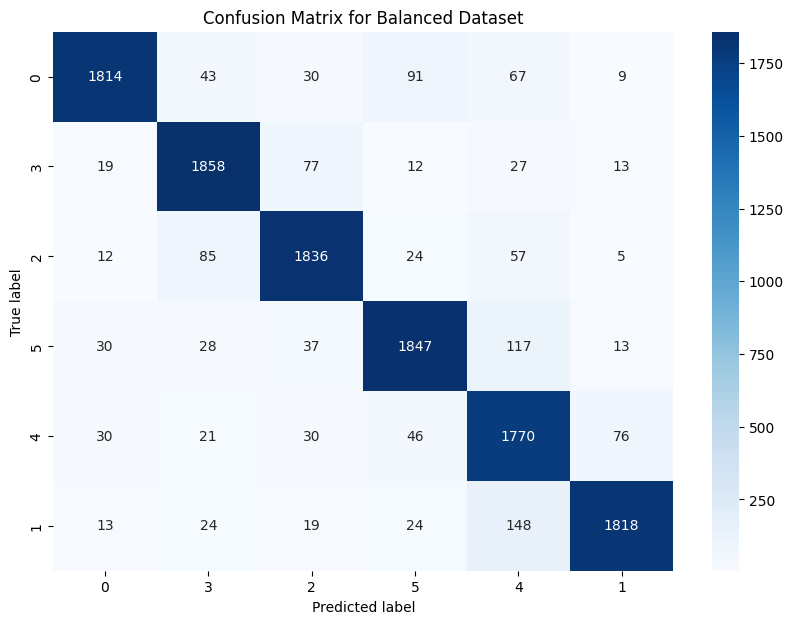

In [ ]:
# Class labels (adjust according to your dataset)
class_labels = df_imbalanced['label'].astype(str).unique().tolist()  # If labels are numeric

# Load models (if not already in memory)
model_imbalanced = load_model('lstm_imbalanced.h5')
model_balanced = load_model('lstm_balanced.h5')

# Evaluate and plot for imbalanced dataset
evaluate_and_plot(model_imbalanced, X_test_imbalanced, y_test_imbalanced, class_labels, 'Imbalanced Dataset')

# Evaluate and plot for balanced dataset
evaluate_and_plot(model_balanced, X_test_balanced, y_test_balanced, class_labels, 'Balanced Dataset')


## BERT on BOTH variants of the Datasets

In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install transformers[torch]

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

class TwitterDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, item):
        text = str(self.texts[item])
        label = self.labels[item]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True  # Ensure truncation
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


# Set up the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Initialize the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6).to(device)

# Load data
df = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/twitter.csv')  # Adjust path as necessary
df_balanced = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/balanced_twitter.csv')  # Adjust path as necessary

train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.1)
train_dataset = TwitterDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len=128)
val_dataset = TwitterDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_len=128)
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

def train_and_save(dataset_path, model_save_path, tokenizer_save_path, output_dir, logging_dir, dataset_name):
    # Load the dataset
    df = pd.read_csv(dataset_path)
    train_texts, val_texts, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.1)

    # Initialize tokenizer and datasets
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    train_dataset = TwitterDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, max_len=128)
    val_dataset = TwitterDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, max_len=128)

    # Initialize the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6).to(device)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=5,
        learning_rate=2e-5,
        per_device_train_batch_size=128,
        per_device_eval_batch_size=128,
        warmup_steps=500,
        weight_decay=0.01,
        evaluation_strategy="steps",
        logging_dir=logging_dir,
        save_total_limit=1,
        save_steps=500,
        load_best_model_at_end=True
    )

    # Print which dataset is currently training
    print(f"\nTraining starting for {dataset_name}...")

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Train the model
    trainer.train()

    # Save the model and tokenizer
    model.save_pretrained(model_save_path)
    tokenizer.save_pretrained(tokenizer_save_path)

    print(f"Training completed for {dataset_name}. Model saved at {model_save_path}")

# Specify paths for model and tokenizer saving
model_path_imbalanced = "/content/bert_emotion_twitter_imbalanced"
model_path_balanced = "/content/bert_emotion_twitter_balanced"

# Train on imbalanced dataset
train_and_save(
    '/content/drive/MyDrive/HEMANTH-dmmL2/twitter.csv',
    model_path_imbalanced,
    model_path_imbalanced,  # tokenizer saves in the same path
    '/content/drive/MyDrive/HEMANTH-dmmL2/content/results_imbalanced',
    '/content/drive/MyDrive/HEMANTH-dmmL2/content/logs_imbalanced',
    'Imbalanced Dataset'
)

# Train on balanced dataset
train_and_save(
    '/content/drive/MyDrive/HEMANTH-dmmL2/balanced_twitter.csv',
    model_path_balanced,
    model_path_balanced,  # tokenizer saves in the same path
    '/content/drive/MyDrive/HEMANTH-dmmL2/content/results_balanced',
    '/content/drive/MyDrive/HEMANTH-dmmL2/content/logs_balanced',
    'Balanced Dataset'
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training starting for Imbalanced Dataset...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training completed for Imbalanced Dataset. Model saved at /content/bert_emotion_twitter_imbalanced


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training starting for Balanced Dataset...


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Training completed for Balanced Dataset. Model saved at /content/bert_emotion_twitter_balanced


In [ ]:
# Load the dataset to find the unique labels
df = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/twitter.csv')

# Derive class labels from the dataset
unique_labels = sorted(df['label'].unique())
class_labels = [str(label) for label in unique_labels]  # Convert to strings if labels are numeric


In [ ]:
import numpy as np

def get_predictions(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    real_values = []

    with torch.no_grad():  # Disable gradient calculation
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            real_values.extend(labels.cpu().numpy())

    return np.array(predictions), np.array(real_values)



Imbalanced Dataset - Test Accuracy: 95.00%

Imbalanced Dataset - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       608
           1       0.97      0.96      0.97       666
           2       0.85      0.93      0.89       162
           3       0.98      0.92      0.95       264
           4       0.88      0.94      0.91       219
           5       1.00      0.72      0.83        81

    accuracy                           0.95      2000
   macro avg       0.94      0.91      0.92      2000
weighted avg       0.95      0.95      0.95      2000



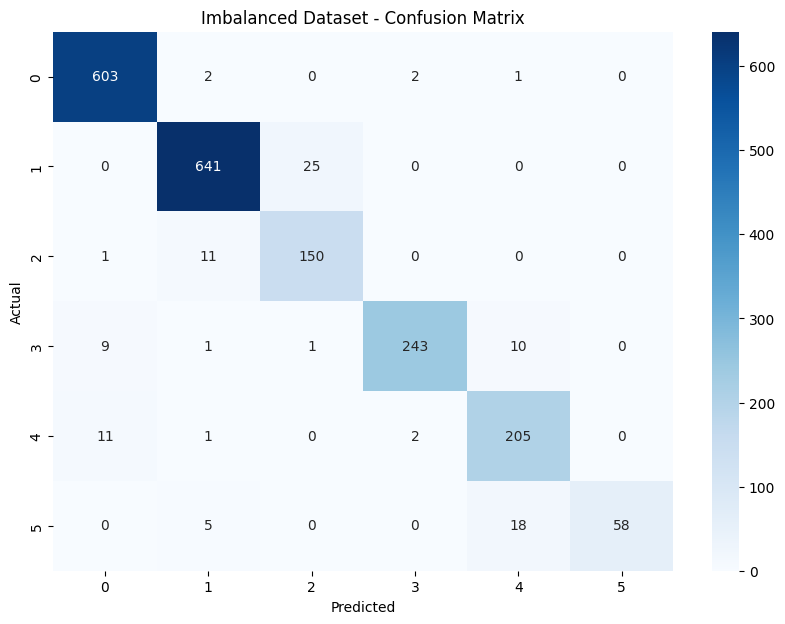

In [ ]:
from transformers import BertForSequenceClassification

def load_model_and_evaluate(data_loader, class_labels, dataset_type, model_path):
    from transformers import BertTokenizer, BertForSequenceClassification

    # Load the model and tokenizer
    tokenizer = BertTokenizer.from_pretrained(model_path)
    model = BertForSequenceClassification.from_pretrained(model_path).to(device)

    # Get predictions
    predictions, real_values = get_predictions(model, data_loader)

    # Calculate accuracy
    accuracy = accuracy_score(real_values, predictions)
    print(f'\n{dataset_type} Dataset - Test Accuracy: {accuracy * 100:.2f}%')

    # Print classification report
    print(f'\n{dataset_type} Dataset - Classification Report:')
    print(classification_report(real_values, predictions, target_names=class_labels))

    # Plot confusion matrix
    cm = confusion_matrix(real_values, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'{dataset_type} Dataset - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# Assuming the saved model path is known
model_path = "/content/bert_emotion_twitter_imbalanced"  # Example for imbalanced dataset

# Load the model and evaluate
# Usage example: Evaluate the model for the imbalanced dataset
val_loader_imbalanced = DataLoader(val_dataset, batch_size=32)  # Assuming val_dataset from previous setup
load_model_and_evaluate(val_loader_imbalanced, class_labels, 'Imbalanced', model_path)
model_path_b = "/content/bert_emotion_twitter_balanced"  # Example for balanced dataset




Balanced Dataset - Test Accuracy: 93.17%

Balanced Dataset - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       703
           1       0.95      0.95      0.95       682
           2       0.93      0.94      0.93       670
           3       0.92      0.96      0.94       689
           4       0.90      0.89      0.89       631
           5       0.94      0.91      0.92       682

    accuracy                           0.93      4057
   macro avg       0.93      0.93      0.93      4057
weighted avg       0.93      0.93      0.93      4057



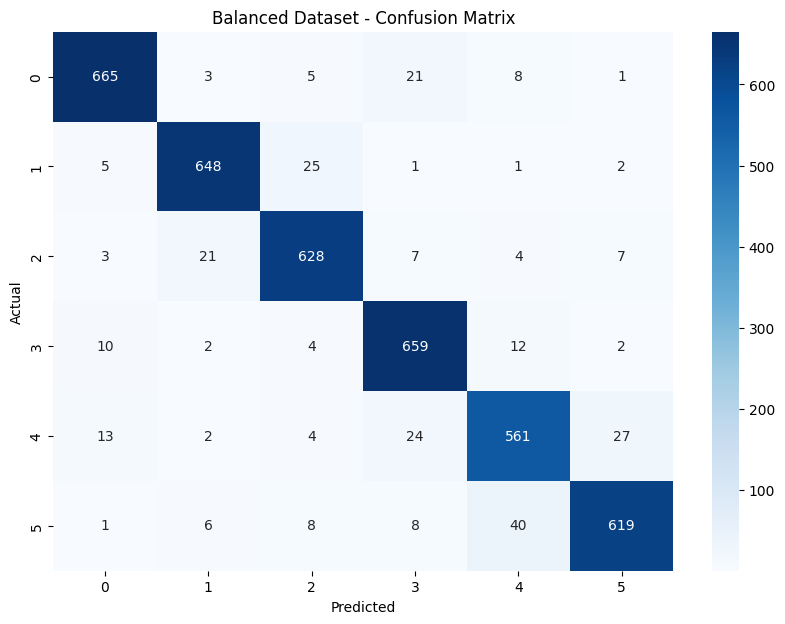

In [ ]:
# Load the balanced dataset
df_balanced = pd.read_csv('/content/drive/MyDrive/HEMANTH-dmmL2/balanced_twitter.csv')

# Tokenize and split the balanced dataset
train_texts_balanced, val_texts_balanced, train_labels_balanced, val_labels_balanced = train_test_split(
    df_balanced['text'], df_balanced['label'], test_size=0.1
)

# Create the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create the dataset objects
train_dataset_balanced = TwitterDataset(train_texts_balanced.tolist(), train_labels_balanced.tolist(), tokenizer, max_len=128)
val_dataset_balanced = TwitterDataset(val_texts_balanced.tolist(), val_labels_balanced.tolist(), tokenizer, max_len=128)

# Setup DataLoader for balanced dataset
val_loader_balanced = DataLoader(val_dataset_balanced, batch_size=32)



# Evaluate the model for the balanced dataset
load_model_and_evaluate(val_loader_balanced, class_labels, 'Balanced', model_path_b)


##

# GoEmotions

## bALANCED FINAL GOeMOTIONS


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import string
import emoji
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load dataset from CSV
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Text Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Convert emojis to text
    text = emoji.demojize(text)

    # Tokenization, lowercasing, stopword removal, and lemmatization
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

# Load and preprocess dataset
file_path = '/content/drive/MyDrive/HEMANTH-dmmL2/balanced_goemotions.csv'  # Update this to the path of your dataset
df = load_dataset(file_path)

# Preprocess the text data
df['processed_text'] = df['Text'].apply(preprocess_text)

# Tokenize and convert texts to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
word_index = tokenizer.word_index

# Word2Vec Embeddings
from gensim.models import Word2Vec
word2vec_model = Word2Vec([text.split() for text in df['processed_text']], vector_size=200, window=5, min_count=1, sg=1)

# Prepare embedding matrix
embedding_dim = 200
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Pad sequences
max_len = 200
X = pad_sequences(sequences, maxlen=max_len)

# Extract labels
labels = df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].values
num_classes = labels.shape[1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the LSTM model with improved architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 200)          9204600   
                                                                 
 bidirectional_2 (Bidirecti  (None, 200, 512)          935936    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200, 512)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
# Corrected Classification Report and Confusion Matrix Code

# Predict classes for the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# List of actual class names without 'Text'
target_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


921/921 [==============================] - 12s 12ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.71      0.68      0.69      7828
     disgust       0.89      0.91      0.90      4252
        fear       0.91      0.92      0.92      4443
         joy       0.81      0.64      0.71      4369
     sadness       0.71      0.64      0.68      4342
    surprise       0.70      0.37      0.48      4336
     neutral       0.59      0.37      0.46      4412

   micro avg       0.77      0.65      0.70     33982
   macro avg       0.76      0.65      0.69     33982
weighted avg       0.75      0.65      0.69     33982
 samples avg       0.66      0.65      0.65     33982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('/content/drive/MyDrive/HEMANTH-dmmL2/GOBalancedemotion_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##BERT

In [ ]:
!pip install transformers
!pip install emoji
!pip install datasets
!pip install torch
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
# Import required libraries
import re
import emoji
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EvalPrediction
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function for custom preprocessing
def custom_preprocess(text):
    # Remove @ symbols and anything that follows (e.g., mentions)
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Convert emojis to text
    text = emoji.demojize(text)

    # Remove non-alphanumeric characters except spaces and underscores
    text = re.sub(r'[^A-Za-z0-9_\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

# Define a custom Dataset class for BERT
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = torch.tensor(self.labels[idx], dtype=torch.float)
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': labels
        }

# Load dataset
file_path = '/content/drive/MyDrive/HEMANTH-dmmL2/balanced_goemotions.csv'  # Update with your dataset file path
df = pd.read_csv(file_path)

# Preprocess the text data
df['processed_text'] = df['Text'].apply(custom_preprocess)

# Set up tokenizer and labels
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
labels = df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].values

# Split data
texts = df['processed_text'].tolist()
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create Datasets
max_len = 128
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_len)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_len)

# Load DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize BERT model for multi-label classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Define compute_metrics function for accuracy
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    labels = np.argmax(p.label_ids, axis=1)
    accuracy = accuracy_score(labels, preds)
    return {"accuracy": accuracy}

# Set up TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/HEMANTH-dmmL2/results',
    num_train_epochs=3,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    gradient_accumulation_steps=8,
    learning_rate=2e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/HEMANTH-dmmL2/logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Test Accuracy: {eval_results['eval_accuracy'] * 100:.2f}%")

# Save the model
model.save_pretrained('/content/drive/MyDrive/HEMANTH-dmmL2/bert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/HEMANTH-dmmL2/bert_model')




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Accuracy: 63.55%


('/content/drive/MyDrive/HEMANTH-dmmL2/bert_model/tokenizer_config.json',
 '/content/drive/MyDrive/HEMANTH-dmmL2/bert_model/special_tokens_map.json',
 '/content/drive/MyDrive/HEMANTH-dmmL2/bert_model/vocab.txt',
 '/content/drive/MyDrive/HEMANTH-dmmL2/bert_model/added_tokens.json')

In [ ]:
# Predictions
preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
target_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.55      0.57      7828
     disgust       0.67      0.67      0.67      4216
        fear       0.78      0.79      0.79      4433
         joy       0.74      0.81      0.77      4235
     sadness       0.18      0.35      0.24       627
    surprise       0.64      0.55      0.59      4053
     neutral       0.52      0.55      0.53      4053

    accuracy                           0.64     29445
   macro avg       0.59      0.61      0.60     29445
weighted avg       0.64      0.64      0.64     29445



## Un Balanced

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
!pip install transformers
!pip install emoji
!pip install datasets
!pip install torch
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 39.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py

In [ ]:
# Import required libraries
import re
import emoji
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EvalPrediction
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function for custom preprocessing
def custom_preprocess(text):
    # Remove @ symbols and anything that follows (e.g., mentions)
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Convert emojis to text
    text = emoji.demojize(text)

    # Remove non-alphanumeric characters except spaces and underscores
    text = re.sub(r'[^A-Za-z0-9_\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    return text

# Define a custom Dataset class for BERT
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        labels = torch.tensor(self.labels[idx], dtype=torch.float)
        encoding = self.tokenizer.encode_plus(
            text,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': labels
        }

# Load dataset
file_path = '/content/drive/MyDrive/HEMANTH-dmmL2/combined_data.csv'  # Update with your dataset file path
df = pd.read_csv(file_path)

# Preprocess the text data
df['processed_text'] = df['Text'].apply(custom_preprocess)

# Set up tokenizer and labels
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
labels = df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].values

# Split data
texts = df['processed_text'].tolist()
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create Datasets
max_len = 128
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_len)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_len)

# Load DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Initialize BERT model for multi-label classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=labels.shape[1])

# Define compute_metrics function for accuracy
def compute_metrics(p: EvalPrediction):
    preds = np.argmax(p.predictions, axis=1)
    labels = np.argmax(p.label_ids, axis=1)
    accuracy = accuracy_score(labels, preds)
    return {"accuracy": accuracy}

# Set up TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/HEMANTH-dmmL2/unBalancedresults',
    num_train_epochs=3,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    gradient_accumulation_steps=8,
    learning_rate=2e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/HEMANTH-dmmL2/unbalcnedlogs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(f"Test Accuracy: {eval_results['eval_accuracy'] * 100:.2f}%")

# Save the model
model.save_pretrained('/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model')




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Test Accuracy: 45.98%


('/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model/tokenizer_config.json',
 '/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model/special_tokens_map.json',
 '/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model/vocab.txt',
 '/content/drive/MyDrive/HEMANTH-dmmL2/unbalanced_bert_model/added_tokens.json')

In [ ]:
# Predictions
preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
target_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00      1456
     disgust       0.00      0.00      0.00       170
        fear       0.00      0.00      0.00       179
         joy       0.46      0.94      0.62      4257
     sadness       0.00      0.00      0.00       645
    surprise       0.00      0.00      0.00       971
     neutral       0.46      0.31      0.37      3175

    accuracy                           0.46     10853
   macro avg       0.13      0.18      0.14     10853
weighted avg       0.32      0.46      0.35     10853



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##LSTM on Un Balanced Dataset

In [ ]:
import pandas as pd
import nltk
import string
import emoji
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load dataset from CSV
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Text Preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Convert emojis to text
    text = emoji.demojize(text)

    # Tokenization, lowercasing, stopword removal, and lemmatization
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

# Load and preprocess dataset
file_path = '/content/drive/MyDrive/HEMANTH-dmmL2/combined_data.csv'  # Update this to the path of your dataset
df = load_dataset(file_path)

# Preprocess the text data
df['processed_text'] = df['Text'].apply(preprocess_text)

# Tokenize and convert texts to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])
word_index = tokenizer.word_index

# Word2Vec Embeddings
from gensim.models import Word2Vec
word2vec_model = Word2Vec([text.split() for text in df['processed_text']], vector_size=200, window=5, min_count=1, sg=1)

# Prepare embedding matrix
embedding_dim = 200
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

# Pad sequences
max_len = 200
X = pad_sequences(sequences, maxlen=max_len)

# Extract labels
labels = df[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].values
num_classes = labels.shape[1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Build the LSTM model with improved architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(256)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          5344600   
                                                                 
 bidirectional (Bidirection  (None, 200, 512)          935936    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 200, 512)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

340/340 [==============================] - 5s 10ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.66      0.18      0.29      1456
     disgust       0.69      0.22      0.34       214
        fear       0.71      0.15      0.25       188
         joy       0.85      0.66      0.74      4381
     sadness       0.76      0.21      0.33       804
    surprise       0.69      0.12      0.20      1251
     neutral       0.59      0.49      0.53      3534

   micro avg       0.73      0.45      0.55     11828
   macro avg       0.71      0.29      0.38     11828
weighted avg       0.72      0.45      0.52     11828
 samples avg       0.48      0.46      0.47     11828



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


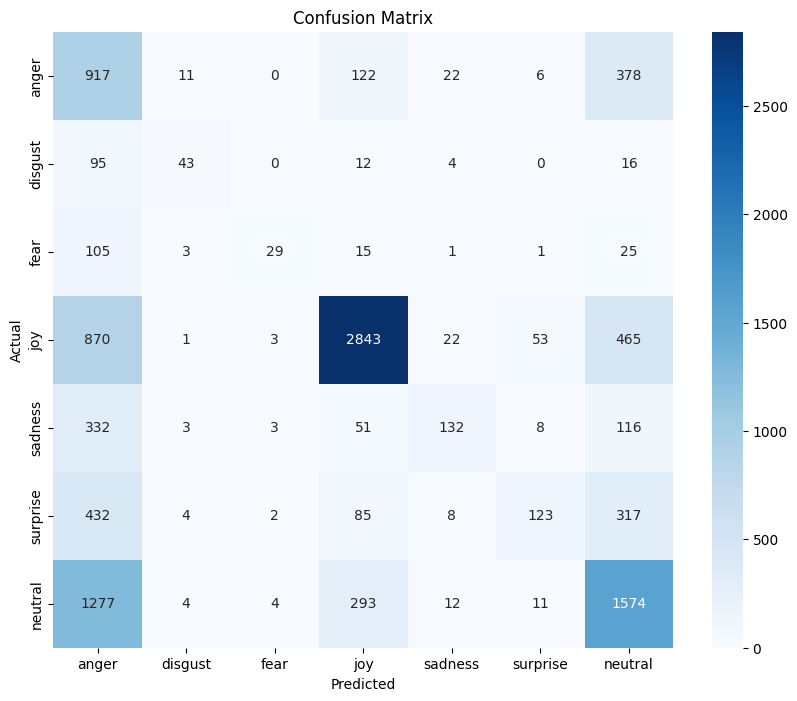

In [ ]:
# Corrected Classification Report and Confusion Matrix Code

# Predict classes for the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# List of actual class names without 'Text'
target_names = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Import required libraries
import pandas as pd
import re
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function for custom preprocessing
def custom_preprocess(text):
    # Remove @ symbols and anything that follows (e.g., mentions)
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Convert emojis to text
    text = emoji.demojize(text)

    # Remove non-alphanumeric characters except spaces and underscores
    text = re.sub(r'[^A-Za-z0-9_\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Load dataset again
file_path = '/content/drive/MyDrive/HEMANTH-dmmL2/combined_data.csv'  # Update with your dataset file path
df_new = pd.read_csv(file_path)

# Preprocess the text data for visualization
df_new['processed_text'] = df_new['Text'].apply(custom_preprocess)

# Concatenate all processed text for word frequency analysis
all_words = ' '.join(df_new['processed_text'].tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words')
plt.show()

# Get the most common words
word_counts = Counter(all_words.split())
most_common_words = word_counts.most_common(20)

# Display most common words
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
name: 9864
like: 4055
im: 3930
dont: 2960
love: 2376
thats: 2318
get: 2307
one: 2277
would: 2149
good: 2135
people: 2125
really: 1826
think: 1784
know: 1777
thanks: 1622
youre: 1559
lol: 1498
time: 1453
see: 1424
thank: 1344
